In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [182]:
dv = pd.read_csv("AGE_results.csv")

In [185]:
dv.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'AGE', 'PTEDUCAT',
       'APOE4', 'ADAS11', 'MMSE', 'ABETA_bl', 'TAU_bl', 'PTAU_bl', 'M',
       'filenames', 'DX_bl_AD', 'DX_bl_CN', 'DX_bl_EMCI', 'DX_bl_LMCI',
       'DX_bl_SMC', 'PTGENDER_Female', 'PTGENDER_Male', 'PTGENDER_nan',
       'PTMARRY_Divorced', 'PTMARRY_Married', 'PTMARRY_Never married',
       'AGE_PRED', 'AGE_UNET'],
      dtype='object')

In [151]:
plt.annotate?

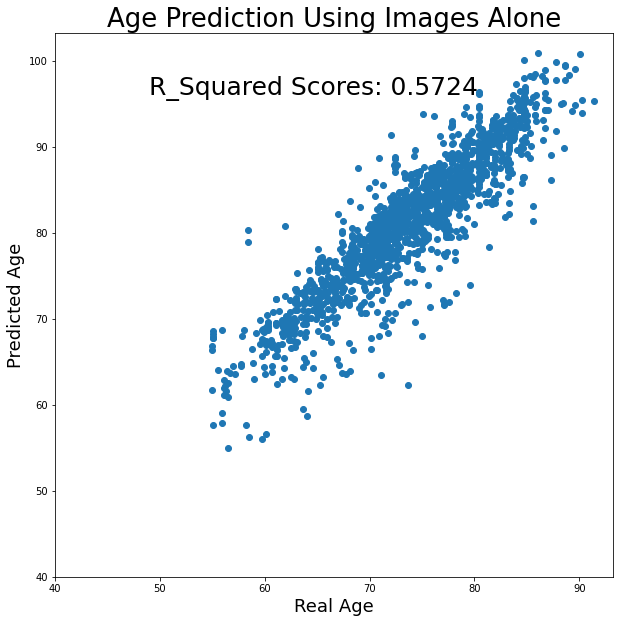

In [184]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

# fig, ax = plt.subplots()

plt.scatter(dv.AGE, dv.AGE_PRED)
plt.xlabel("Real Age", fontsize=18)
plt.ylabel("Predicted Age", fontsize=18)
plt.title("Age Prediction Using Images Alone", fontsize=26)
# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#     np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
# ]

# # now plot both limits against eachother
# ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlim(lims)
# ax.set_ylim(lims)
r2 = r2_score(dv.AGE, dv.AGE_PRED)
plt.annotate("R_Squared Scores: 0.5724", (49, 96), fontsize=25)

plt.xlim(40, None)
plt.ylim(40, None)
plt.show()

# TODO:
## Combine this with the Dementia Classification?

- Goal? Try a __UNET does both : AGE + Cognitive__ (Sex, PTEDUCATE, Marriage.)

- Parse the Pure Delta as a demographic input

- Add Sex, or do it separately between sex (2 models)

Pathological AGE - as a surrogate for ages -> NDM model

- Tau PET Scans ; Regional Atrophy w/ tabular alone. (data should be in ADNIMERGE.csv) reduces circularity.

In [2]:
healthy = pd.read_csv("Healthy_with_volume.csv")

In [3]:
healthy.filenames

0       sub-ADNI100S0006_ses-M18_T1w
1       sub-ADNI100S0006_ses-M36_T1w
2       sub-ADNI100S0015_ses-M12_T1w
3       sub-ADNI100S0015_ses-M36_T1w
4       sub-ADNI100S5280_ses-M24_T1w
                    ...             
1287    sub-ADNI023S4115_ses-M84_T1w
1288    sub-ADNI007S4272_ses-M84_T1w
1289    sub-ADNI068S4431_ses-M84_T1w
1290    sub-ADNI116S4855_ses-M72_T1w
1291    sub-ADNI051S5285_ses-M48_T1w
Name: filenames, Length: 1292, dtype: object

In [200]:
healthy.filenames.str.split("_")[0][0]
# healthy.loc[:, "subject"] = healthy.filenames.str.split("_")[0]

'sub-ADNI100S0006'

In [48]:
patient_files = pickle.load(open( "/home/madar/patient_files.data", "rb" ))
pf = list(set(map(lambda x: x[0], patient_files)))

In [15]:
patient_files

[('sub-ADNI036S5283_ses-M36_T1w.nii', 36),
 ('sub-ADNI021S0276_ses-M06_T1w.nii.gz', 6),
 ('sub-ADNI009S5000_ses-M24_T1w.nii', 24),
 ('sub-ADNI128S5123_ses-M12_T1w.nii', 12),
 ('sub-ADNI027S4804_ses-M12_T1w.nii', 12),
 ('sub-ADNI128S4653_ses-M24_T1w.nii', 24),
 ('sub-ADNI003S0907_ses-M36_T1w.nii.gz', 36),
 ('sub-ADNI019S4548_ses-M12_T1w.nii', 12),
 ('sub-ADNI128S1408_ses-M96_T1w.nii', 96),
 ('sub-ADNI021S4245_ses-M48_T1w.nii', 48),
 ('sub-ADNI021S2100_ses-M48_T1w.nii', 48),
 ('sub-ADNI024S4169_ses-M72_T1w.nii', 72),
 ('sub-ADNI032S2247_ses-M60_T1w.nii', 60),
 ('sub-ADNI068S2184_ses-M84_T1w.nii', 84),
 ('sub-ADNI014S0658_ses-M72_T1w.nii', 72),
 ('sub-ADNI003S4555_ses-M24_T1w.nii', 24),
 ('sub-ADNI129S4287_ses-M48_T1w.nii', 48),
 ('sub-ADNI116S4453_ses-M72_T1w.nii', 72),
 ('sub-ADNI009S5176_ses-M24_T1w.nii', 24),
 ('sub-ADNI036S5271_ses-M36_T1w.nii', 36),
 ('sub-ADNI129S0778_ses-M06_T1w.nii.gz', 6),
 ('sub-ADNI016S4121_ses-M48_T1w.nii', 48),
 ('sub-ADNI116S1271_ses-M06_T1w.nii.gz', 6),
 (

In [4]:
len(pf)

1126

In [5]:
with open('/home/madar/Downloads/train_files5.data', 'rb') as filehandle:
        X_tr = pickle.load(filehandle)

In [7]:
len(X_tr)

1152

In [11]:
pf

['sub-ADNI018S0335_ses-M06_T1w.nii.gz',
 'sub-ADNI072S2026_ses-M12_T1w.nii',
 'sub-ADNI068S2187_ses-M96_T1w.nii',
 'sub-ADNI027S5277_ses-M24_T1w.nii',
 'sub-ADNI126S4891_ses-M48_T1w.nii',
 'sub-ADNI037S0454_ses-M06_T1w.nii.gz',
 'sub-ADNI127S4624_ses-M48_T1w.nii',
 'sub-ADNI005S5038_ses-M12_T1w.nii',
 'sub-ADNI100S1113_ses-M06_T1w.nii',
 'sub-ADNI036S2378_ses-M60_T1w.nii',
 'sub-ADNI011S1080_ses-M48_T1w.nii',
 'sub-ADNI126S4896_ses-M48_T1w.nii',
 'sub-ADNI018S0286_ses-M06_T1w.nii.gz',
 'sub-ADNI023S4034_ses-M12_T1w.nii',
 'sub-ADNI057S0934_ses-M84_T1w.nii',
 'sub-ADNI022S1351_ses-M60_T1w.nii',
 'sub-ADNI073S2225_ses-M48_T1w.nii',
 'sub-ADNI006S0498_ses-M72_T1w.nii',
 'sub-ADNI031S0554_ses-M06_T1w.nii.gz',
 'sub-ADNI037S4381_ses-M48_T1w.nii',
 'sub-ADNI035S4783_ses-M12_T1w.nii',
 'sub-ADNI053S5296_ses-M60_T1w.nii',
 'sub-ADNI009S0842_ses-M06_T1w.nii.gz',
 'sub-ADNI131S0384_ses-M96_T1w.nii',
 'sub-ADNI073S4825_ses-M12_T1w.nii',
 'sub-ADNI002S2043_ses-M12_T1w.nii',
 'sub-ADNI003S0907_ses-

In [8]:
with open('/home/madar/Downloads/val_files5.data', 'rb') as filehandle:
    X_v = pickle.load(filehandle)

In [17]:
pickle.load(open('/home/madar/Downloads/train_files5.data', 'rb'))

['sub-ADNI116S0361_ses-M24_T1w',
 'sub-ADNI098S4506_ses-M24_T1w',
 'sub-ADNI031S0618_ses-M84_T1w',
 'sub-ADNI002S2073_ses-M72_T1w',
 'sub-ADNI035S0997_ses-M60_T1w',
 'sub-ADNI129S1204_ses-M06_T1w',
 'sub-ADNI052S1346_ses-M96_T1w',
 'sub-ADNI100S0069_ses-M96_T1w',
 'sub-ADNI007S4620_ses-M84_T1w',
 'sub-ADNI082S5282_ses-M60_T1w',
 'sub-ADNI053S0919_ses-M48_T1w',
 'sub-ADNI100S1286_ses-M12_T1w',
 'sub-ADNI007S2106_ses-M36_T1w',
 'sub-ADNI116S0370_ses-M24_T1w',
 'sub-ADNI137S0301_ses-M96_T1w',
 'sub-ADNI041S4720_ses-M24_T1w',
 'sub-ADNI021S0337_ses-M24_T1w',
 'sub-ADNI094S2367_ses-M48_T1w',
 'sub-ADNI098S0269_ses-M60_T1w',
 'sub-ADNI123S0088_ses-M12_T1w',
 'sub-ADNI003S4350_ses-M48_T1w',
 'sub-ADNI128S2123_ses-M48_T1w',
 'sub-ADNI116S0752_ses-M36_T1w',
 'sub-ADNI052S1168_ses-M18_T1w',
 'sub-ADNI016S4009_ses-M24_T1w',
 'sub-ADNI013S4580_ses-M72_T1w',
 'sub-ADNI032S2247_ses-M60_T1w',
 'sub-ADNI100S1062_ses-M06_T1w',
 'sub-ADNI053S4578_ses-M48_T1w',
 'sub-ADNI126S4675_ses-M24_T1w',
 'sub-ADNI

In [12]:
X_tr

['sub-ADNI116S0361_ses-M24_T1w',
 'sub-ADNI098S4506_ses-M24_T1w',
 'sub-ADNI031S0618_ses-M84_T1w',
 'sub-ADNI002S2073_ses-M72_T1w',
 'sub-ADNI035S0997_ses-M60_T1w',
 'sub-ADNI129S1204_ses-M06_T1w',
 'sub-ADNI052S1346_ses-M96_T1w',
 'sub-ADNI100S0069_ses-M96_T1w',
 'sub-ADNI007S4620_ses-M84_T1w',
 'sub-ADNI082S5282_ses-M60_T1w',
 'sub-ADNI053S0919_ses-M48_T1w',
 'sub-ADNI100S1286_ses-M12_T1w',
 'sub-ADNI007S2106_ses-M36_T1w',
 'sub-ADNI116S0370_ses-M24_T1w',
 'sub-ADNI137S0301_ses-M96_T1w',
 'sub-ADNI041S4720_ses-M24_T1w',
 'sub-ADNI021S0337_ses-M24_T1w',
 'sub-ADNI094S2367_ses-M48_T1w',
 'sub-ADNI098S0269_ses-M60_T1w',
 'sub-ADNI123S0088_ses-M12_T1w',
 'sub-ADNI003S4350_ses-M48_T1w',
 'sub-ADNI128S2123_ses-M48_T1w',
 'sub-ADNI116S0752_ses-M36_T1w',
 'sub-ADNI052S1168_ses-M18_T1w',
 'sub-ADNI016S4009_ses-M24_T1w',
 'sub-ADNI013S4580_ses-M72_T1w',
 'sub-ADNI032S2247_ses-M60_T1w',
 'sub-ADNI100S1062_ses-M06_T1w',
 'sub-ADNI053S4578_ses-M48_T1w',
 'sub-ADNI126S4675_ses-M24_T1w',
 'sub-ADNI

In [10]:
X_v

['sub-ADNI012S0634_ses-M06_T1w',
 'sub-ADNI116S1243_ses-M84_T1w',
 'sub-ADNI010S0422_ses-M36_T1w',
 'sub-ADNI130S4925_ses-M24_T1w',
 'sub-ADNI009S2381_ses-M48_T1w',
 'sub-ADNI005S0602_ses-M96_T1w',
 'sub-ADNI116S1315_ses-M36_T1w',
 'sub-ADNI009S0862_ses-M24_T1w',
 'sub-ADNI116S0648_ses-M24_T1w',
 'sub-ADNI116S0382_ses-M12_T1w',
 'sub-ADNI029S2376_ses-M24_T1w',
 'sub-ADNI133S0727_ses-M36_T1w',
 'sub-ADNI002S1155_ses-M96_T1w',
 'sub-ADNI037S0501_ses-M96_T1w',
 'sub-ADNI041S4427_ses-M72_T1w',
 'sub-ADNI098S0160_ses-M72_T1w',
 'sub-ADNI094S1330_ses-M24_T1w',
 'sub-ADNI072S1380_ses-M06_T1w',
 'sub-ADNI067S5159_ses-M24_T1w',
 'sub-ADNI012S0634_ses-M24_T1w',
 'sub-ADNI019S5019_ses-M12_T1w',
 'sub-ADNI009S1354_ses-M06_T1w',
 'sub-ADNI137S0796_ses-M12_T1w',
 'sub-ADNI129S4396_ses-M24_T1w',
 'sub-ADNI127S4500_ses-M24_T1w',
 'sub-ADNI022S1394_ses-M48_T1w',
 'sub-ADNI137S0668_ses-M06_T1w',
 'sub-ADNI021S0231_ses-M24_T1w',
 'sub-ADNI021S0273_ses-M06_T1w',
 'sub-ADNI024S4084_ses-M72_T1w',
 'sub-ADNI

In [9]:
len(X_v)

240

In [3]:
# from prep_pipeline import *
# from imports import *
# from scipy.stats.stats import pearsonr 
# from CogDataset3d import *
# # import lazypredict
# # from lazypredict.Supervised import LazyRegressor

# import warnings
# warnings.filterwarnings("ignore")
# %load_ext autoreload
# %autoreload 2

In [2]:
df = pd.read_csv('cleaned_df_5_31.csv')

In [7]:
df.shape

(1643, 21)

In [5]:
df.loc[df.ADAS11<=18].shape

(1292, 21)

In [ ]:
df.loc[df.ADAS11<=8].shape

In [4]:
df = pd.read_csv('cleaned_df_5_31.csv')
X_tr, X_v = get_file_splits()
X_train, X_val, y_adas_train, y_adas_val, y_mmse_train, y_mmse_val= split_train_val(X_tr, X_v, df)

In [5]:
X_train.columns

Index(['AGE', 'PTEDUCAT', 'APOE4', 'ABETA_bl', 'TAU_bl', 'PTAU_bl', 'M',
       'DX_bl_AD', 'DX_bl_CN', 'DX_bl_EMCI', 'DX_bl_LMCI', 'DX_bl_SMC',
       'PTGENDER_Female', 'PTGENDER_Male', 'PTGENDER_nan', 'PTMARRY_Divorced',
       'PTMARRY_Married', 'PTMARRY_Never married'],
      dtype='object')

In [6]:
X_train.shape, X_val.shape

((1152, 18), (240, 18))

In [7]:
from sklearn.ensemble import *
pipe = Pipeline([('regressor', HistGradientBoostingRegressor(loss = 'poisson', l2_regularization=.25, max_depth = 6, random_state=42))])
pipe.fit(X_train, y_adas_train)
hgradboost_pred = pipe.predict(X_val)
hgradboost_pred_train = pipe.predict(X_train)

print(f"{'hgradboost Train Loss'}: {round(mean_squared_error(y_adas_train, hgradboost_pred_train),3)}")
print(f"{'hgradboost Train R2  '}: {round(r2_score(y_adas_train, hgradboost_pred_train),3)}\n")
print(f"{'hgradboost Valid Loss'}: {round(mean_squared_error(y_adas_val, hgradboost_pred),3)}")
print(f"{'hgradboost Valid R2  '}: {round(r2_score(y_adas_val, hgradboost_pred),3)}\n")

hgradboost Train Loss: 18.696
hgradboost Train R2  : 0.802

hgradboost Valid Loss: 53.724
hgradboost Valid R2  : 0.427



In [8]:
from joblib import dump, load
dump(pipe, 'hgb_model.joblib') 

['hgb_model.joblib']

In [9]:
! pwd

/home/madar/unet2021


In [10]:
! ls

01-datasets.ipynb	hgb_model.joblib  prep_pipeline.py
02-tabular-clean.ipynb	imports.py	  __pycache__
cleaned_df_5_31.csv	initialize.py	  unet3d-lightning-tabular.py
CogDataset3d.py		models		  Untitled.ipynb
